# Generate blood vessels with random bezier curves

In [1]:
import matplotlib.pyplot as plt
from vessel_geometry import VesselGeometry
import numpy as np

In [2]:
size = 256 
# Set a random seed for reproducibility
np.random.seed(42)

# Define the ranges for the parameters
size = 256
n_control_points_range = (2, 15)    # "complexity" of the curves
max_vd_range = (50.0, 150.0)        # Sets the typical curvature of the curves
radius_range = (1, 4)               # Radius of each curve
num_curves_range = (1, 15)          # Number of curves to generate

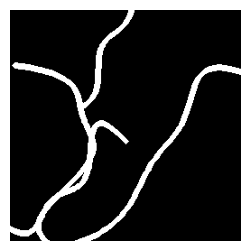

In [13]:
n_control_points = np.random.randint(*n_control_points_range)
max_vd = np.random.uniform(*max_vd_range)
radius = np.random.randint(*radius_range)
num_curves = np.random.randint(*num_curves_range)

vg = VesselGeometry(size, n_control_points, max_vd, radius, num_curves)
img = vg.create_curves()

plt.figure(figsize=(3,3))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()


Gerando imagens: 100%|██████████| 2/2 [00:00<00:00, 28.09it/s]



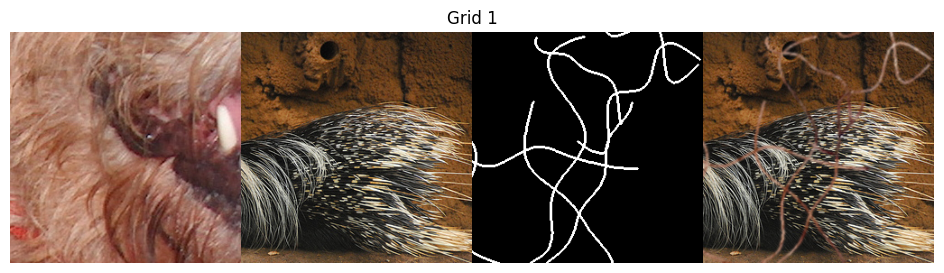

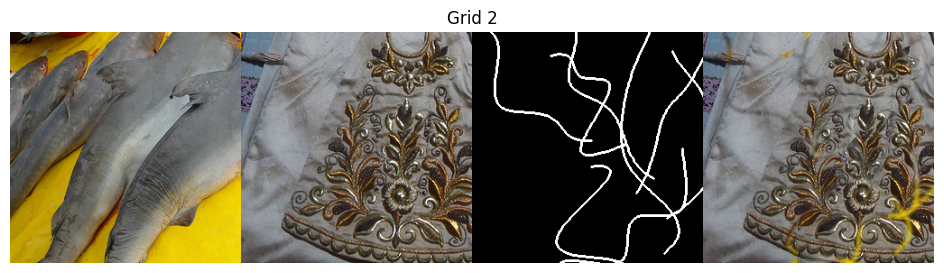

In [14]:
# Teste de geração do VesselShape em memória
from vessel_shape import VesselShape

# Defina o diretório de texturas conforme necessário
texture_dir = 'imagenet_val_sample'  # Substitua pelo caminho correto

n_control_points = np.random.randint(*n_control_points_range)
max_vd = np.random.uniform(*max_vd_range)
radius = np.random.randint(*radius_range)
num_curves = np.random.randint(*num_curves_range)

vs = VesselShape(
    image_size=size,
    n_control_points=n_control_points,
    max_vd=max_vd,
    radius=radius,
    num_curves=num_curves,
    texture_dir=texture_dir,
    annotation_csv="imagenet_val_sample/ILSVRC2012_img_val_annotation.csv"
)

# Gerar uma amostra em memória
results = vs.generate(grid_dir=True, n_samples=2)

# Exibe os grids gerados dinamicamente
for i, result in enumerate(results):
    grid = result['grid']
    plt.figure(figsize=(12,3))
    plt.imshow(grid)
    plt.axis('off')
    plt.title(f"Grid {i+1}")
    plt.show()